# __Walmart Dataset - Descriptive Analysis__

## Importing libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [118]:
data = pd.read_csv('Walmart.csv')

In [119]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [120]:

data.columns = ['Store_No.', 'Date', 'Weekly_Sales', 'Holiday','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [121]:
data.columns

Index(['Store_No.', 'Date', 'Weekly_Sales', 'Holiday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [122]:
data.shape

(6435, 8)

In [123]:
data.describe()

,Store_No.,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [124]:
data.isnull().sum()

Store_No.       0
Date            0
Weekly_Sales    0
Holiday         0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [125]:
data.head()

,Store_No.,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [126]:
data.dtypes
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

## How many weekly sales Walmart perform from 01-04-2011 to 02-03-2012 ?

In [127]:

data_df = data[['Date','Weekly_Sales']]
data_df = data_df.groupby('Date').sum()
data_df.head()



,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


Text(0, 0.5, 'Weekly sales')

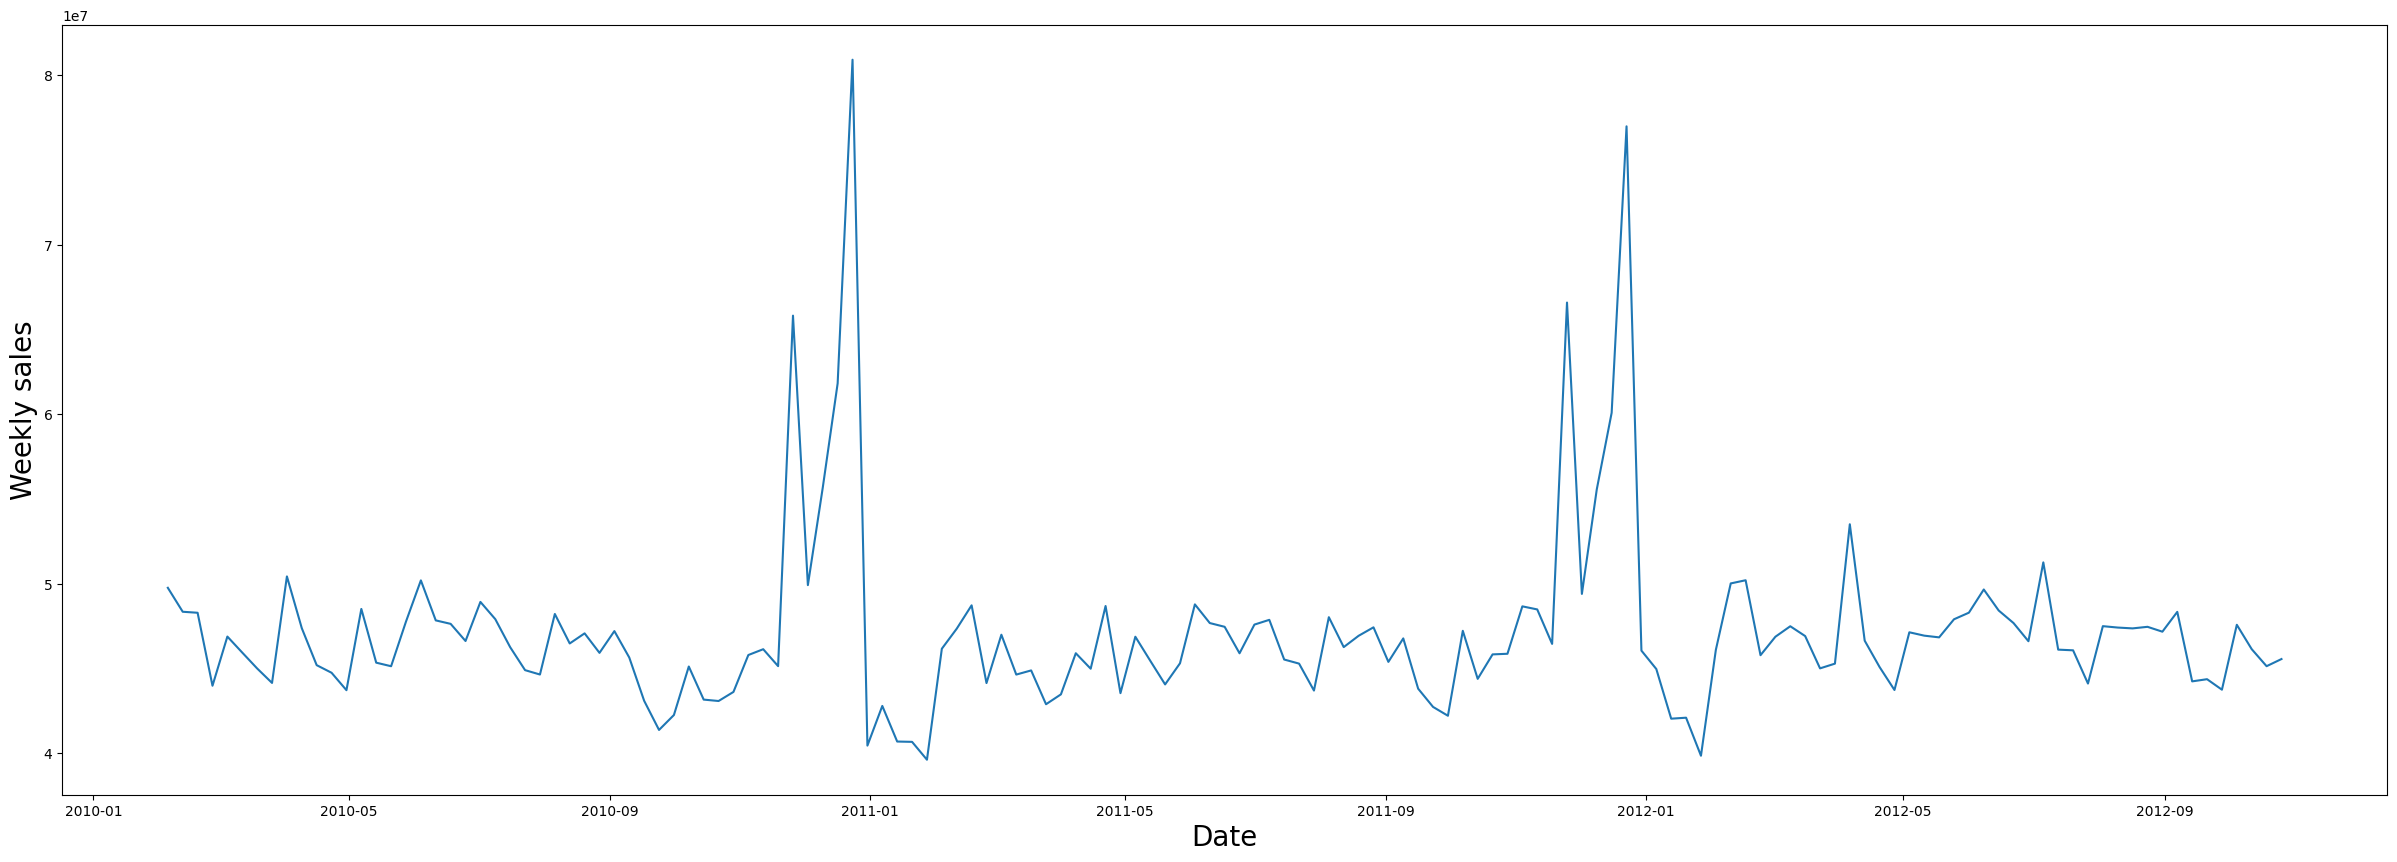

In [128]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

%matplotlib inline                          
rcParams['figure.figsize'] = 30, 10
plt.plot(data_df)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Weekly sales', fontsize = 20)

In [129]:
top_5_indices = data['Weekly_Sales'].nlargest(5).index
data.iloc[top_5_indices]

,Store_No.,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_17490/1407846125.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = cm.get_cmap('tab20', len(yrs))


<Axes: title={'center': 'Num per year'}, xlabel='MonthYr'>

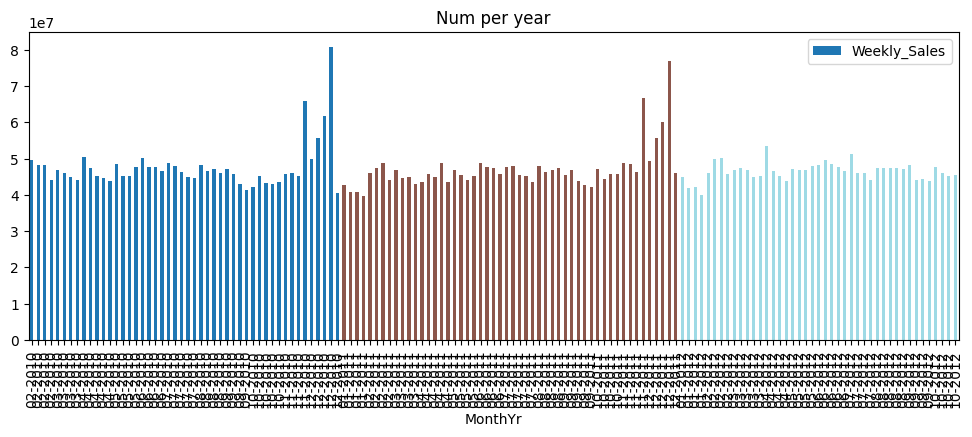

In [145]:

df1 = data_df.reset_index()
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

# color map based on years
yrs = np.unique(df1['Year'])
c = cm.get_cmap('tab20', len(yrs))
## probably a more elegant way to do this...
yrClr = np.zeros((len(df1['Year']),4))
for i, v in enumerate(yrs): 
    yrClr[df1['Year']==v,:]=c.colors[i,:]

fig, axs = plt.subplots(figsize=(12, 4))
df1['MonthYr']=pd.to_datetime(df1.assign(day=1)[['Year','Month','day']]).dt.strftime('%m-%Y')
df1.plot(kind='bar', x='MonthYr', y='Weekly_Sales', color=yrClr, title="Num per year",ax=axs)

In [154]:
test_dada = df1[['MonthYr','Weekly_Sales']].groupby('MonthYr').sum()
test_dada['Weekly_Sales'].nlargest(5).index

Index(['12-2010', '12-2011', '06-2012', '08-2012', '07-2010'], dtype='object', name='MonthYr')

## How many monthly weekly sales by Store ?

Text(0, 0.5, 'Weekly sales')

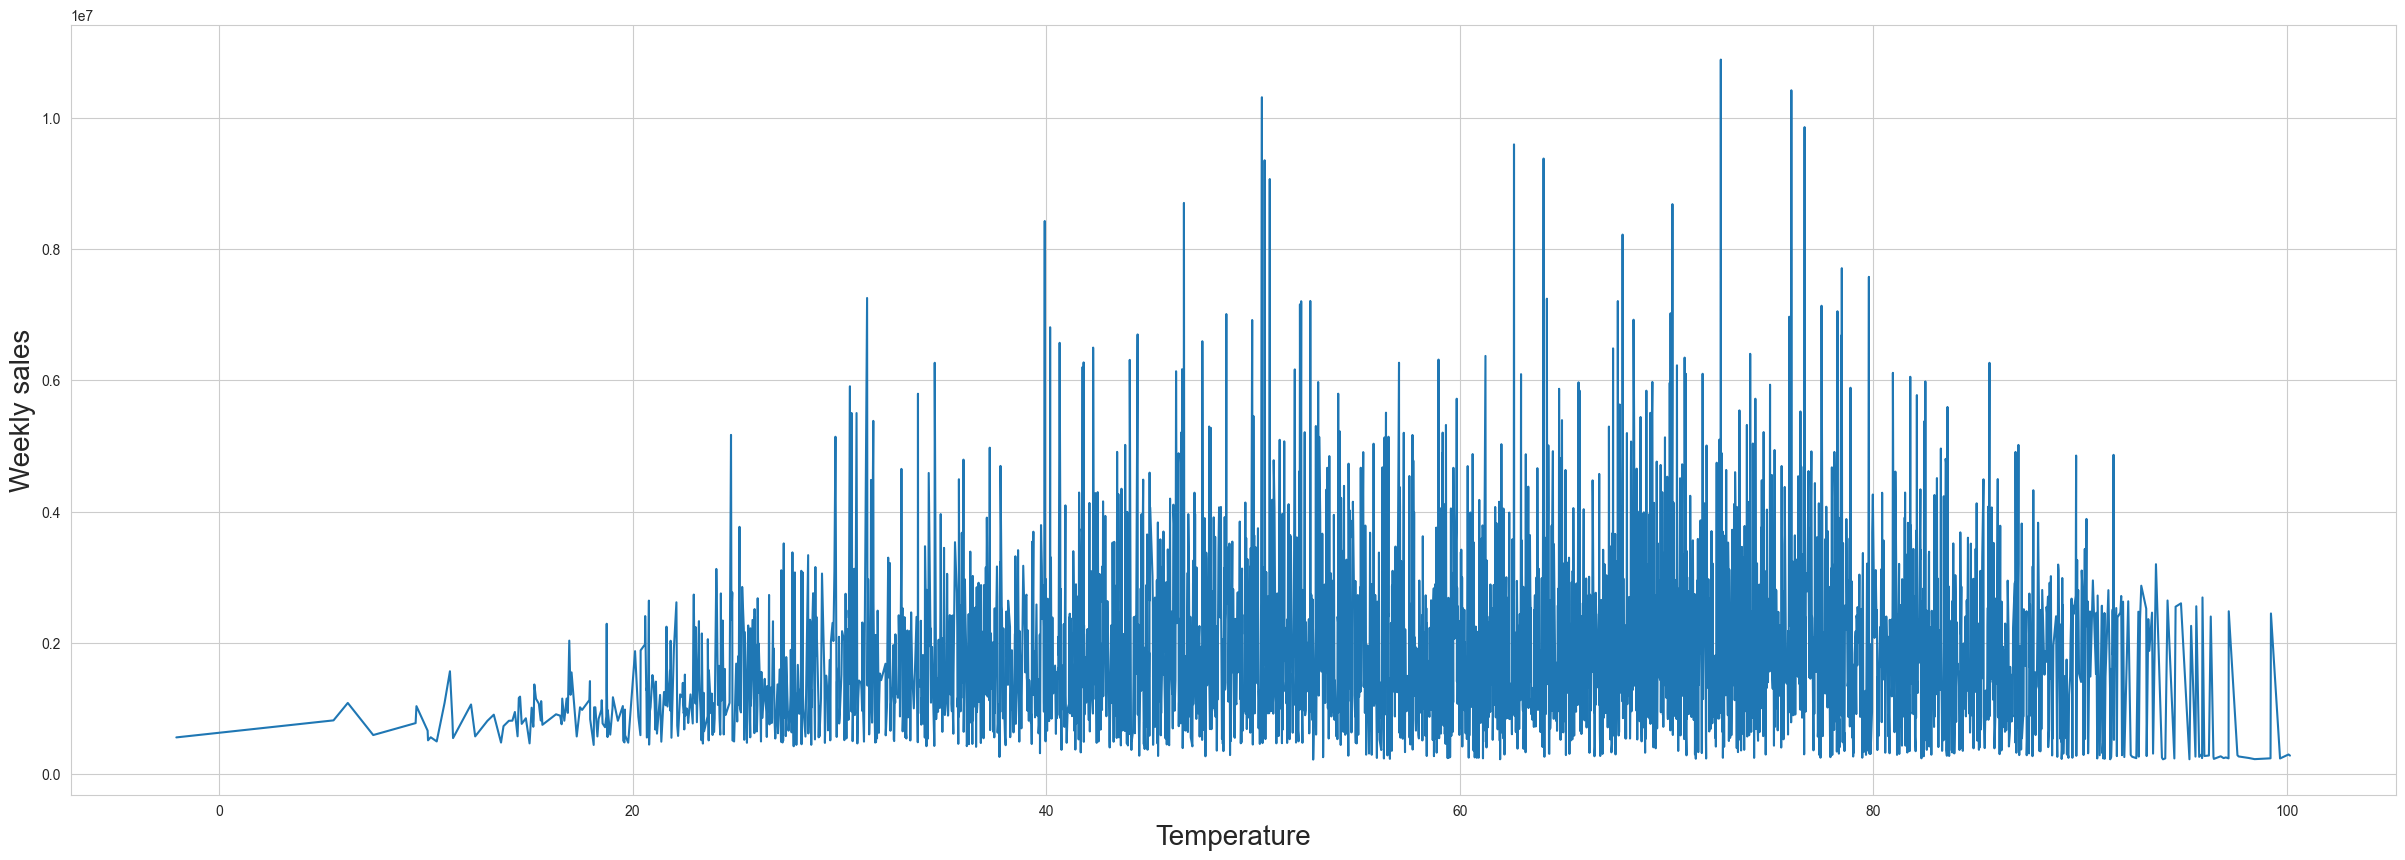

In [125]:
data_tg = data[['Temperature','Weekly_Sales']]
data_tg = data_tg.groupby('Temperature').sum()
data_tg = data_tg.reset_index()
plt.plot(data_tg['Temperature'],data_tg['Weekly_Sales'])
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('Weekly sales', fontsize = 20)

In [100]:
data.head()


,Store_No.,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,CPI
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143


In [102]:
data.dtypes

Store_No.         int64
Date             object
Weekly_Sales    float64
Holiday           int64
Temperature     float64
Fuel_Price      float64
CPI             float64
dtype: object

dataset: number of samples (rows) (6435)
number of features (columns), 6



continuity of data (neighbouring data points have similar values), signal to noise ratio, manifold number of dimensions of the underlying process that generated the dataset (an audio file has many dimensions, but only a few muscles in our face are used to